In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
dataset = pd.read_csv("StudentsPerformance.csv")

In [4]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
dataset.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
X = dataset[['math score', 'reading score',
       'writing score']]

In [17]:
X.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


## K means Clustering

In [22]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

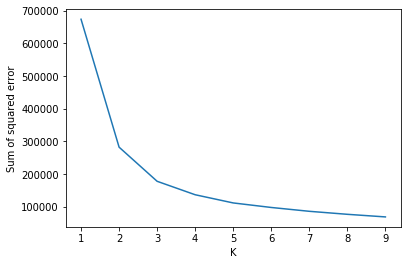

In [23]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [30]:
km=KMeans(n_clusters=3)
km.fit(X)
km.labels_

array([2, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 0, 2,
       2, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0,
       1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 0, 1, 2, 1,
       1, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 1, 2, 1,
       2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0,
       1, 1, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 0, 1, 0,
       2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0,

Text(0.5, 1.0, 'kmeans')

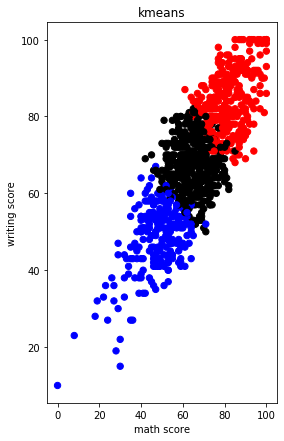

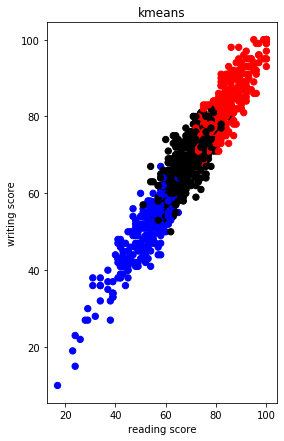

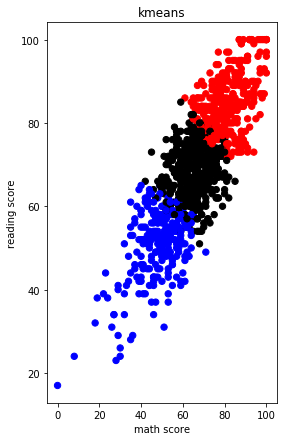

In [38]:
colormap=np.array(['red','blue','black'])
plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.scatter(X["math score"],X["writing score"],c=colormap[km.labels_],s=40)
plt.xlabel("math score")
plt.ylabel("writing score")
plt.title("kmeans")


colormap=np.array(['red','blue','black'])
plt.figure(figsize=(14,7))
plt.subplot(1,3,2)
plt.scatter(X["reading score"],X["writing score"],c=colormap[km.labels_],s=40)
plt.xlabel("reading score")
plt.ylabel("writing score")
plt.title("kmeans")



colormap=np.array(['red','blue','black'])
plt.figure(figsize=(14,7))
plt.subplot(1,3,3)
plt.scatter(X["math score"],X["reading score"],c=colormap[km.labels_],s=40)
plt.xlabel("math score")
plt.ylabel("reading score")
plt.title("kmeans")

## Hierarchical clustering

In [39]:
import scipy.cluster.hierarchy as sch

In [40]:
X = dataset.iloc[:, [5, 6, 7]].values

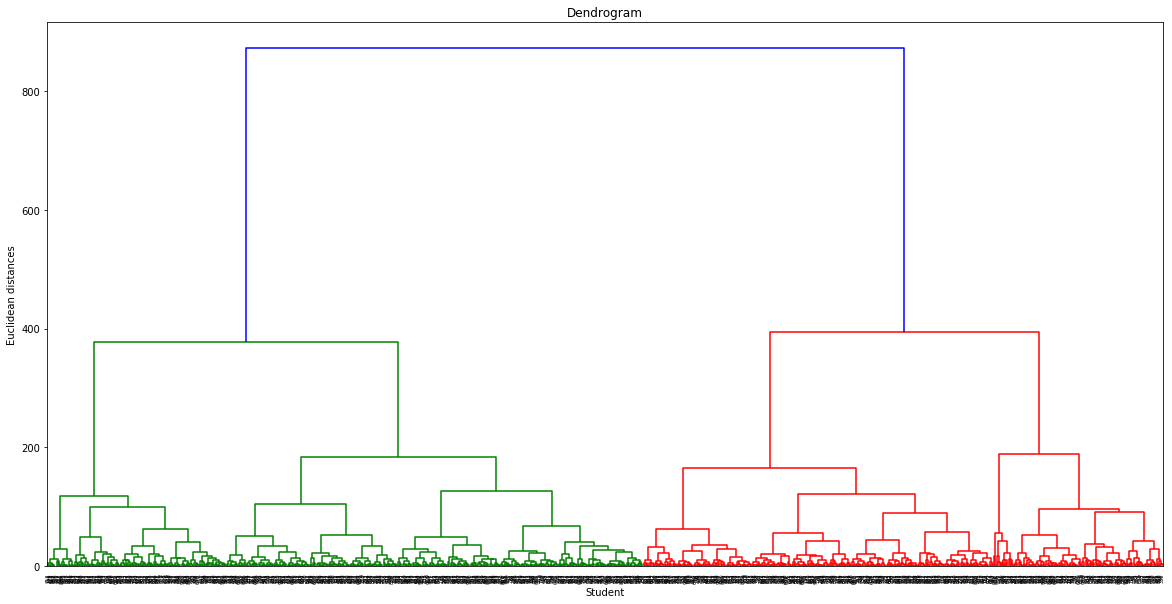

In [41]:
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Student')S
plt.ylabel('Euclidean distances')
plt.show()

In [55]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='complete')

In [56]:
y_hc=hc.fit_predict(X)
y_hc

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,

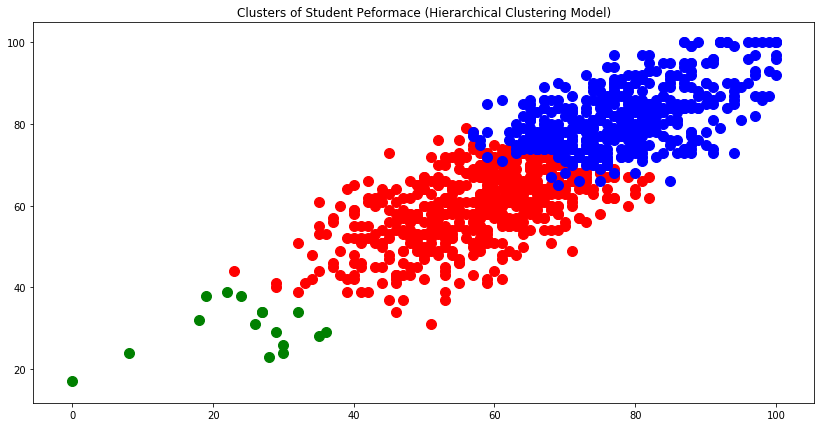

In [58]:
plt.figure(figsize=(14,7))
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='magenta', label ='Cluster 4')
plt.title('Clusters of Student Peformace (Hierarchical Clustering Model)')

plt.show()

## DBSCAN

In [137]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, metric='euclidean', min_samples=2,leaf_size=10)

In [138]:
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=10, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [139]:
dbscan.labels_.shape

(1000,)

In [140]:
import matplotlib.pyplot as pl
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)
pca_2d

array([[ -8.48837536,   1.26411978],
       [-25.46144129, -13.73117695],
       [-43.12175323,  -0.35950596],
       ...,
       [  4.75467372,  -5.15605377],
       [-11.46651782,  -5.47790938],
       [-26.47680822,  -4.83322812]])

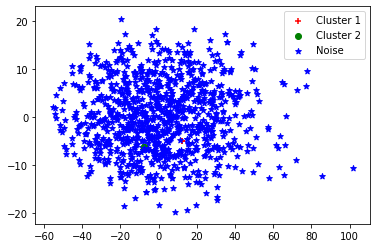

In [141]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
pl.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2','Noise'])
    

In [142]:
from sklearn.cluster import DBSCAN 
epsilon = 0.2
minimumSamples = 2
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1

In [143]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [144]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

20

In [145]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [146]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.72110727, 0.11649366, 0.2828143 , 1.        ],
       [0.83106498, 0.23844675, 0.30880431, 1.        ],
       [0.89488658, 0.33348712, 0.28673587, 1.        ],
       [0.95686275, 0.42745098, 0.2627451 , 1.        ],
       [0.97485582, 0.557401  , 0.32272203, 1.        ],
       [0.99146482, 0.67735486, 0.37808535, 1.        ],
       [0.9940792 , 0.77846982, 0.46113033, 1.        ],
       [0.99607843, 0.87843137, 0.54509804, 1.        ],
       [0.99807766, 0.94040754, 0.64905805, 1.        ],
       [0.99807766, 0.99923106, 0.74602076, 1.        ],
       [0.95194156, 0.98077662, 0.67404844, 1.        ],
       [0.90196078, 0.96078431, 0.59607843, 1.        ],
       [0.78400615, 0.91280277, 0.6200692 , 1.        ],
       [0.66528258, 0.86459054, 0.64321415, 1.        ],
       [0.52733564, 0.8106113 , 0.64521338, 1.        ],
       [0.4       , 0.76078431, 0.64705882, 1.        ],
       [0.29603998, 0.64482891,

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

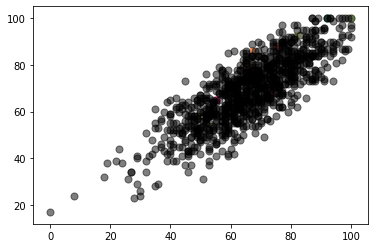

In [148]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)

In [166]:
dataset["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

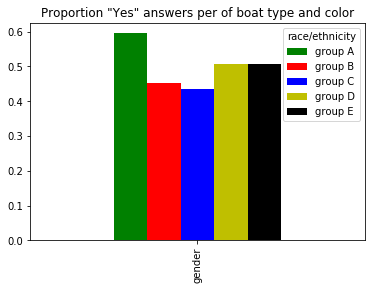

In [178]:
import matplotlib.pyplot as plt
import pandas as pd
df = dataset

ax = df[["gender","race/ethnicity"]].replace(["male","female"], [1,0]).groupby("race/ethnicity").mean().transpose().plot.bar(color=["g","r",'b','y','black'])
ax.set_title('Proportion "Yes" answers per of boat type and color')
plt.show()

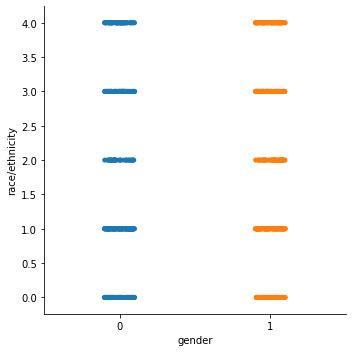

In [185]:
sns.catplot(x="gender", y="race/ethnicity", data=dataset.replace(["male","female"], [0,1]).replace(['group A', 'group B', 'group C', 'group D', 'group E'],[0,1,2,3,4]));

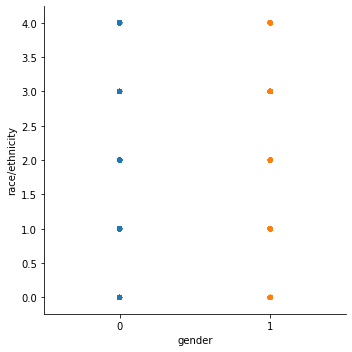

In [187]:
sns.catplot(x="gender", y="race/ethnicity",jitter=False, data=dataset.replace(["male","female"], [0,1]).replace(['group A', 'group B', 'group C', 'group D', 'group E'],[0,1,2,3,4]));

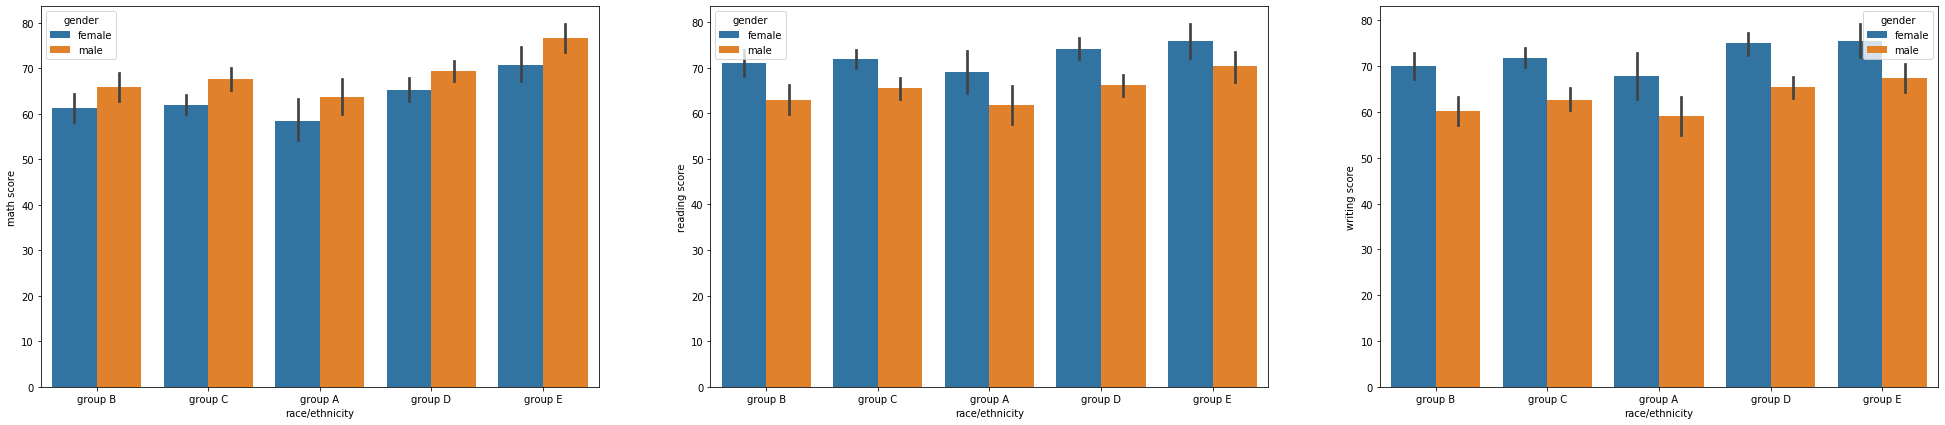

In [212]:
plt.figure(figsize=(34,7))
plt.subplot(1,3,1)
sns.barplot(x='race/ethnicity',y='math score', hue="gender",data=dataset)

plt.subplot(1,3,2)
sns.barplot(x='race/ethnicity',y='reading score', hue="gender",data=dataset)

plt.subplot(1,3,3)
sns.barplot(x='race/ethnicity',y='writing score', hue="gender",data=dataset)

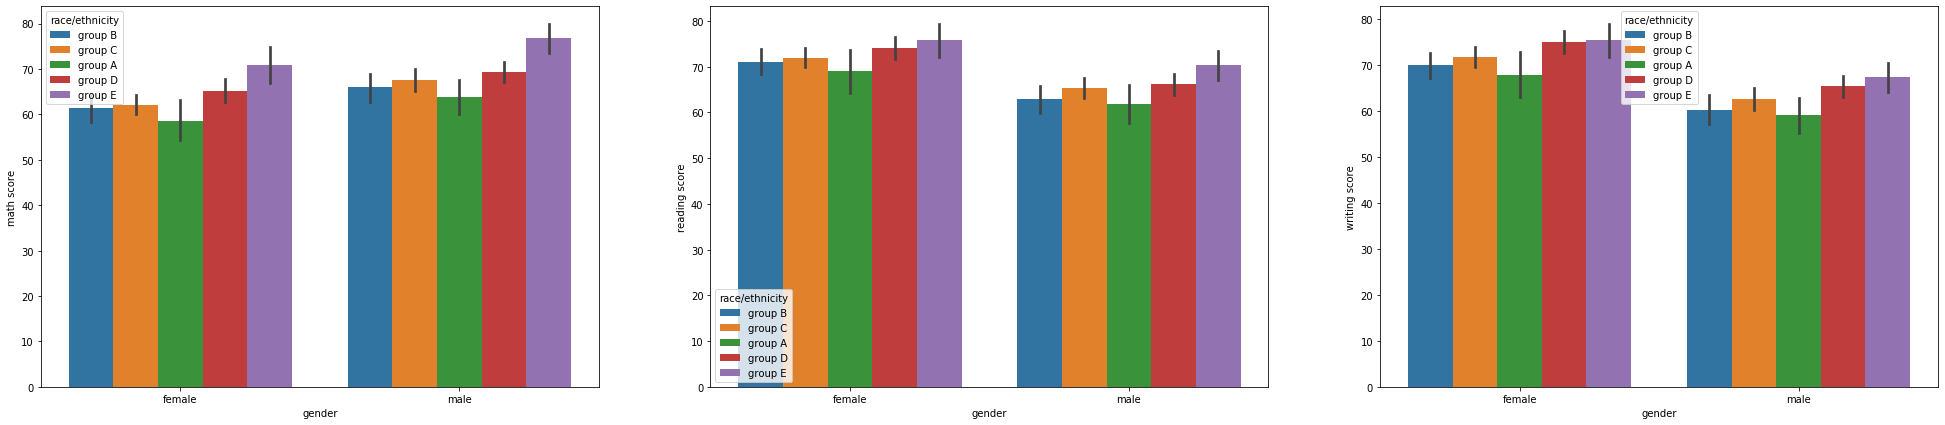

In [215]:
plt.figure(figsize=(34,7))
plt.subplot(1,3,1)
sns.barplot(x='gender',y='math score', hue="race/ethnicity",data=dataset)

plt.subplot(1,3,2)
sns.barplot(x='gender',y='reading score', hue="race/ethnicity",data=dataset)

plt.subplot(1,3,3)
sns.barplot(x='gender',y='writing score', hue="race/ethnicity",data=dataset)

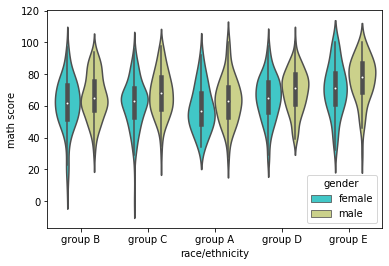

In [222]:
sns.violinplot(x='race/ethnicity',y='math score', hue="gender", data=df,palette='rainbow')

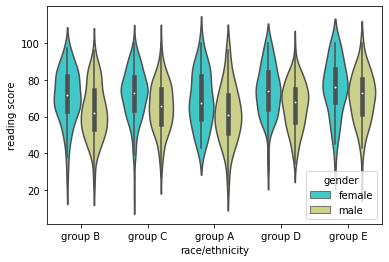

In [221]:
sns.violinplot(x='race/ethnicity',y='reading score', hue="gender", data=df,palette='rainbow')

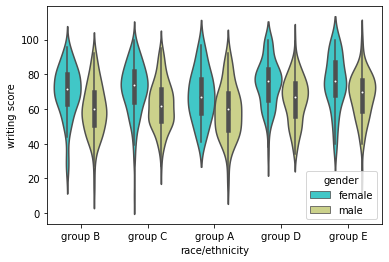

In [220]:
sns.violinplot(x='race/ethnicity',y='writing score', hue="gender", data=df,palette='rainbow')

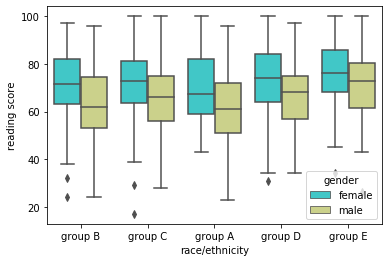

In [227]:
sns.boxplot(x="race/ethnicity", y="reading score", hue="gender",data=dataset, palette='rainbow')

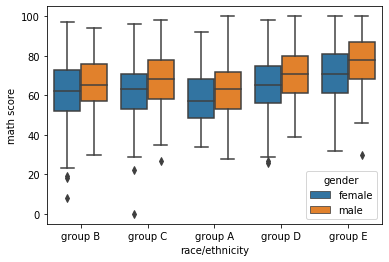

In [224]:
sns.boxplot(x="race/ethnicity", y="math score", hue="gender",data=dataset)

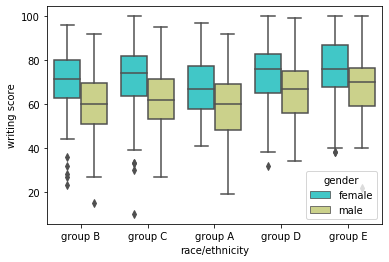

In [226]:
sns.boxplot(x="race/ethnicity", y="writing score", hue="gender",data=dataset, palette='rainbow')

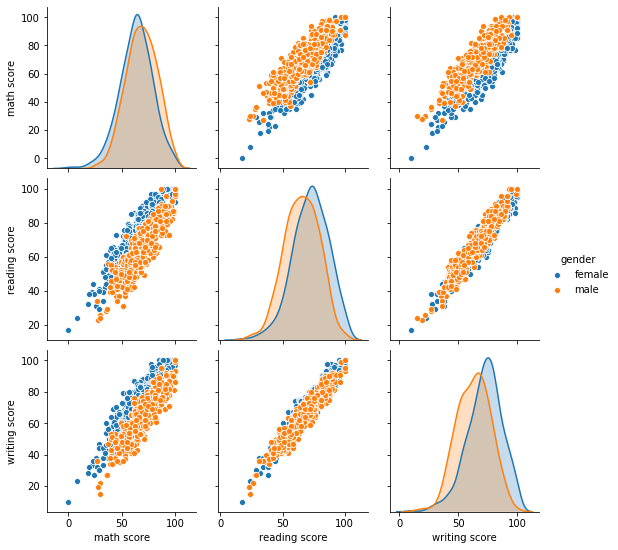

In [228]:
sns.pairplot(dataset,hue='gender')

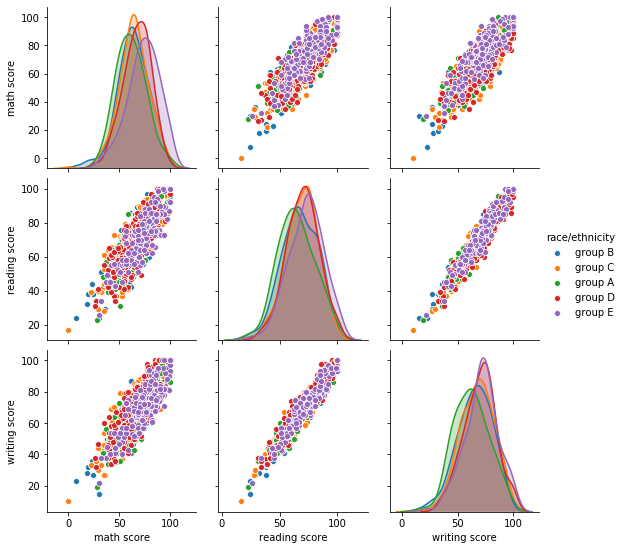

In [230]:
sns.pairplot(dataset,hue='race/ethnicity')

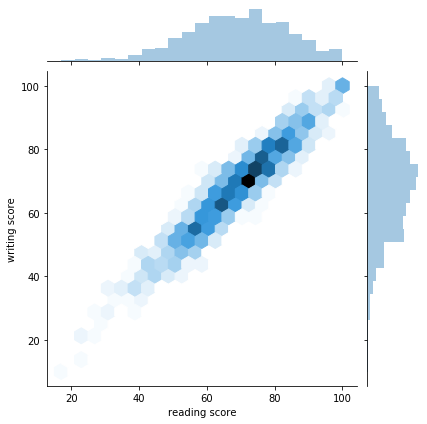

In [231]:
sns.jointplot(x='reading score',y='writing score',data=df,kind='hex')

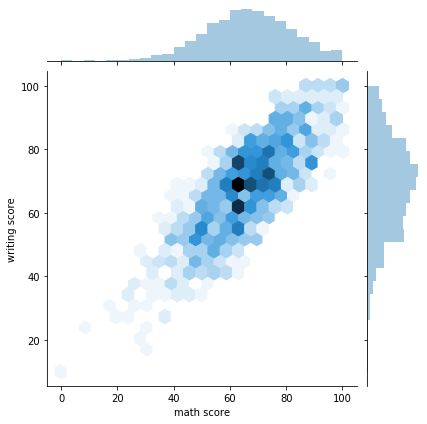

In [232]:
sns.jointplot(x='math score',y='writing score',data=df,kind='hex')

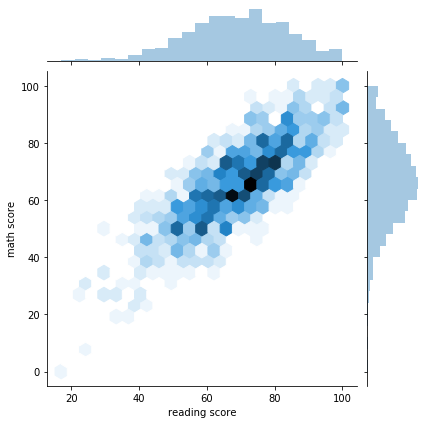

In [233]:
sns.jointplot(x='reading score',y='math score',data=df,kind='hex')